# **1-1. 준비된 Custom Dataset 가져오기**

In [ ]:
!curl -L "https://public.roboflow.com/ds/ysva4s59qk?key=hTDDguO7Z9" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   1516      0 --:--:-- --:--:-- --:--:--  1514
100 66.7M  100 66.7M    0     0  8939k      0  0:00:07  0:00:07 --:--:-- 15.3M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
 extracting: test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
 extracting: test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
 extracting: test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
 extracting: test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
 extracting: test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c30584

**roboflow 에서 제공해준 yaml파일 확인해 보자.**

In [ ]:
!cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

roboflow:
  workspace: brad-dwyer
  project: aquarium-combined
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/brad-dwyer/aquarium-combined/dataset/2

# **2. Custom yaml 파일을 만들자.**

In [ ]:
# PyYAML을 설치하자
!pip install PyYAML

In [ ]:
import yaml

data_cf = {'train' : '/content/train/images',
           'val' : '/content/valid/images',
           'test' : '/content/test/images',
           'names' : ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
           'nc' : 7 }

# Aquarium_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/Aquarium_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# Aquarium_data.yaml 확인
with open('/content/Aquarium_data.yaml', 'r') as f:
  fruit_yaml = yaml.safe_load(f)
  display(fruit_yaml)

{'names': ['fish',
  'jellyfish',
  'penguin',
  'puffin',
  'shark',
  'starfish',
  'stingray'],
 'nc': 7,
 'test': '/content/test/images',
 'train': '/content/train/images',
 'val': '/content/valid/images'}

# **3. YOLO11을 사용하기 위한 Setup(셋업)**

In [ ]:
# ultralytics 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 43.9 MB/s eta 0:00:00


In [ ]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


# **4. Custom YOLO Training(학습)**

**Detection 모델로 사용할 수 있는 모델의 종류**

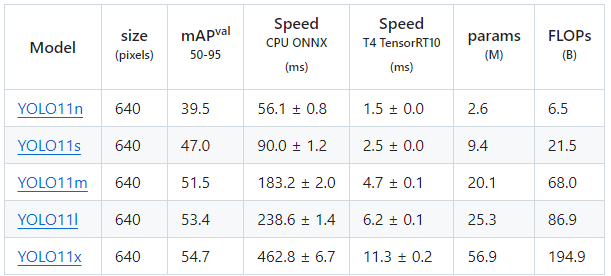

In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolo11n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 304MB/s]


In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [ ]:
model.train(data='/content/Aquarium_data.yaml', epochs=100, batch=16, imgsz=640)

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Aquarium_data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1677.59it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1066.35it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.77G       1.55      3.838      1.276        179        640: 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909     0.0144       0.49     0.0511     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.81G      1.581      3.024      1.244        243        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        127        909     0.0107      0.493     0.0989     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.84G       1.65      2.436      1.286        281        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        127        909      0.561      0.107      0.243      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.78G        1.6      2.169      1.276        300        640: 100%|██████████| 28/28 [00:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        127        909      0.409      0.348      0.347      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.93G      1.573      2.021      1.261        189        640: 100%|██████████| 28/28 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.433      0.403      0.387      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.89G      1.532      1.855      1.259        300        640: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        909      0.407      0.491      0.387      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.68G      1.519      1.806      1.239        220        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        127        909      0.533      0.501      0.499      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.09G      1.548      1.817      1.257        277        640: 100%|██████████| 28/28 [00:08<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        127        909      0.565      0.425      0.473      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.83G        1.5      1.655      1.218        164        640: 100%|██████████| 28/28 [00:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        127        909      0.456      0.475       0.44      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.89G      1.457      1.589      1.202        216        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        127        909      0.613      0.473      0.488      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.82G      1.466      1.593      1.227        174        640: 100%|██████████| 28/28 [00:12<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        127        909      0.484      0.478      0.457      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.68G      1.423      1.517      1.188        161        640: 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        127        909      0.585      0.573      0.593      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.89G      1.466      1.512      1.199        196        640: 100%|██████████| 28/28 [00:08<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        127        909       0.68       0.56       0.62       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.15G      1.482      1.517      1.207        145        640: 100%|██████████| 28/28 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        909      0.555      0.587      0.573        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.77G      1.446      1.468      1.213        164        640: 100%|██████████| 28/28 [00:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        127        909       0.62      0.587      0.599      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.81G      1.426      1.431       1.18        185        640: 100%|██████████| 28/28 [00:11<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        127        909      0.644        0.6      0.623      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.83G      1.426      1.389      1.189        135        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.699      0.599      0.643      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.87G      1.416      1.357      1.185        251        640: 100%|██████████| 28/28 [00:08<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        909      0.678      0.542      0.573      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.66G      1.379      1.328      1.179        186        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        127        909      0.698      0.562      0.632      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.68G      1.405      1.324      1.172        138        640: 100%|██████████| 28/28 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        127        909      0.708      0.622      0.668      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.86G      1.337      1.233      1.133        187        640: 100%|██████████| 28/28 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909      0.669      0.638      0.675      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.66G      1.357      1.232      1.167        227        640: 100%|██████████| 28/28 [00:08<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        127        909       0.71      0.661       0.68      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.66G      1.358      1.228      1.154        179        640: 100%|██████████| 28/28 [00:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        127        909      0.719      0.605      0.662      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.81G      1.311      1.197      1.137        218        640: 100%|██████████| 28/28 [00:12<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        127        909      0.756      0.609      0.682      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.9G      1.324      1.174      1.124        212        640: 100%|██████████| 28/28 [00:12<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        127        909      0.698      0.646      0.684      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.86G      1.326       1.19      1.138        158        640: 100%|██████████| 28/28 [00:09<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        127        909      0.703      0.604      0.668      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.7G      1.313      1.153      1.129        236        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        127        909      0.712       0.64      0.708      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.7G      1.306      1.143      1.136        182        640: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        127        909       0.67      0.612      0.654      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.9G      1.326       1.14      1.129        188        640: 100%|██████████| 28/28 [00:12<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.836      0.591      0.702      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.96G      1.322      1.133       1.14        176        640: 100%|██████████| 28/28 [00:10<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        127        909      0.761      0.618      0.681      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.86G      1.314      1.112      1.128        155        640: 100%|██████████| 28/28 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        909      0.771      0.606      0.694        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.86G      1.293      1.115       1.12        131        640: 100%|██████████| 28/28 [00:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        127        909       0.73      0.647       0.67      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.71G      1.293      1.072      1.107        208        640: 100%|██████████| 28/28 [00:12<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        127        909      0.708      0.676      0.707      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.23G      1.292      1.075      1.117        185        640: 100%|██████████| 28/28 [00:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        127        909      0.758      0.656        0.7      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.65G      1.265      1.053      1.104        149        640: 100%|██████████| 28/28 [00:09<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.822      0.617      0.724      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.79G      1.254      1.039      1.105        139        640: 100%|██████████| 28/28 [00:09<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.784      0.656      0.722      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.71G      1.266       1.03      1.108        190        640: 100%|██████████| 28/28 [00:11<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.713      0.667       0.72      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.85G      1.236      1.005      1.099        164        640: 100%|██████████| 28/28 [00:11<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        127        909       0.75      0.653      0.709      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.78G      1.304      1.049      1.104        147        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        127        909      0.754      0.632      0.713      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.64G      1.236      1.003      1.101        165        640: 100%|██████████| 28/28 [00:08<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.797      0.651      0.724      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.08G      1.237     0.9934      1.097        209        640: 100%|██████████| 28/28 [00:11<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        127        909      0.806      0.657      0.725      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.68G      1.247     0.9933        1.1        274        640: 100%|██████████| 28/28 [00:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.739       0.67      0.698       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.82G      1.234     0.9768       1.09        154        640: 100%|██████████| 28/28 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        127        909       0.73       0.65      0.707      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.64G      1.259     0.9683      1.089        179        640: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        127        909      0.723      0.668      0.702      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.63G      1.191     0.9635      1.077        213        640: 100%|██████████| 28/28 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        127        909      0.786       0.67      0.726      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.55G      1.225     0.9542      1.081        205        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        127        909      0.769      0.699      0.737      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.85G       1.21     0.9398      1.081        191        640: 100%|██████████| 28/28 [00:12<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.775       0.68       0.74      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.67G      1.187     0.9198       1.07        263        640: 100%|██████████| 28/28 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        127        909      0.757      0.698      0.742      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.75G      1.209     0.9228      1.088        216        640: 100%|██████████| 28/28 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        127        909       0.75      0.697      0.747      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.79G       1.18     0.9145      1.074        127        640: 100%|██████████| 28/28 [00:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.725      0.711      0.737      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.74G      1.212      0.936      1.077        218        640: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        127        909      0.814      0.677       0.75      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.67G      1.213     0.9128      1.081         81        640: 100%|██████████| 28/28 [00:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        909      0.774      0.687      0.747      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.05G      1.165     0.8958       1.07        227        640: 100%|██████████| 28/28 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909       0.75      0.698      0.751      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.83G      1.171     0.9047      1.061        154        640: 100%|██████████| 28/28 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        127        909      0.787       0.68      0.744       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.81G      1.159     0.8639      1.062        215        640: 100%|██████████| 28/28 [00:11<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        127        909      0.774      0.678      0.743      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.68G      1.163     0.8562      1.057        169        640: 100%|██████████| 28/28 [00:12<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        127        909      0.779      0.695      0.743      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G      1.162     0.8585      1.051        189        640: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        127        909      0.735      0.728      0.753      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.82G      1.148     0.8516      1.055        262        640: 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        127        909      0.763      0.633      0.711      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.75G      1.178     0.8711      1.064        258        640: 100%|██████████| 28/28 [00:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        127        909      0.803      0.655      0.745       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.05G      1.172     0.8484      1.061        193        640: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        127        909      0.779      0.654      0.737      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.79G      1.145     0.8321      1.049        165        640: 100%|██████████| 28/28 [00:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909        0.8      0.666      0.742      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.95G       1.14      0.826      1.035        241        640: 100%|██████████| 28/28 [00:08<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        127        909      0.791      0.674      0.743      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.68G      1.124     0.8211      1.053        180        640: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        127        909      0.767      0.692      0.748      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.81G      1.135     0.8116      1.041        129        640: 100%|██████████| 28/28 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.752      0.699      0.753      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.84G      1.132     0.8163      1.045        117        640: 100%|██████████| 28/28 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        127        909       0.75      0.674      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.78G       1.09     0.7926      1.018        236        640: 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        127        909      0.773      0.711      0.758      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.76G      1.127       0.79      1.031        222        640: 100%|██████████| 28/28 [00:11<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        127        909      0.816       0.69       0.76      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.54G      1.114     0.7946      1.032        149        640: 100%|██████████| 28/28 [00:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        127        909      0.755      0.703      0.733      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.77G      1.112     0.7817       1.03        182        640: 100%|██████████| 28/28 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        127        909      0.776      0.712      0.749      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.81G      1.108     0.7834      1.032        165        640: 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        127        909      0.748      0.714      0.738      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.97G      1.067     0.7649       1.02        176        640: 100%|██████████| 28/28 [00:11<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        127        909       0.79      0.676      0.749      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.95G      1.068     0.7519       1.02        242        640: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        127        909      0.811      0.696      0.758      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.9G       1.12     0.7874      1.027        178        640: 100%|██████████| 28/28 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        127        909      0.814       0.69      0.759      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.13G       1.09     0.7632      1.018        284        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        127        909      0.812      0.674       0.75      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.8G      1.051     0.7448      1.011        223        640: 100%|██████████| 28/28 [00:11<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        127        909      0.797      0.699      0.758      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.86G      1.091     0.7495       1.03        181        640: 100%|██████████| 28/28 [00:09<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        127        909      0.835      0.683       0.77      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.64G       1.09      0.738      1.026        196        640: 100%|██████████| 28/28 [00:08<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        127        909      0.816      0.681      0.755      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.74G      1.073     0.7517      1.013        121        640: 100%|██████████| 28/28 [00:11<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        127        909      0.812      0.674      0.754       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.65G      1.065     0.7416      1.008        177        640: 100%|██████████| 28/28 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        127        909      0.804      0.713      0.764      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.86G      1.026     0.7289      1.006        207        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        127        909      0.792      0.711      0.764      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.95G      1.064     0.7307      1.009        222        640: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        127        909      0.776      0.711      0.753      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.57G      1.025     0.7107     0.9929        212        640: 100%|██████████| 28/28 [00:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        127        909      0.799      0.672      0.741      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.69G      1.021     0.7039     0.9993        175        640: 100%|██████████| 28/28 [00:11<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        127        909      0.807      0.684      0.749      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         3G      1.064     0.7314      1.007        144        640: 100%|██████████| 28/28 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        127        909      0.811      0.694      0.745      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.69G      1.013     0.7019      1.001        229        640: 100%|██████████| 28/28 [00:10<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        127        909      0.793      0.708      0.758      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.67G      1.022     0.6877     0.9883        122        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        127        909        0.8      0.696      0.752      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.58G      1.016     0.6942     0.9919        154        640: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        127        909      0.779      0.724       0.75      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.69G      1.039     0.6937      1.007        163        640: 100%|██████████| 28/28 [00:08<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        127        909      0.808      0.698      0.755      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G      1.008     0.6949     0.9965        289        640: 100%|██████████| 28/28 [00:09<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        909      0.815      0.702      0.765      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         3G      1.016     0.6846     0.9912        152        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        127        909      0.817      0.715      0.767      0.466


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.72G     0.9866     0.7046     0.9837         82        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        127        909      0.808      0.693      0.759       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.6G      0.991     0.6769     0.9783        134        640: 100%|██████████| 28/28 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        127        909      0.786       0.67      0.744      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.6G     0.9628     0.6486     0.9673        127        640: 100%|██████████| 28/28 [00:08<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        127        909      0.785       0.68      0.746      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.67G     0.9672     0.6384     0.9671         87        640: 100%|██████████| 28/28 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        127        909      0.788      0.685      0.748      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.71G      0.942     0.6373     0.9723        163        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        127        909      0.776      0.693      0.746      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.58G     0.9431     0.6236     0.9631        100        640: 100%|██████████| 28/28 [00:08<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        127        909      0.797      0.685      0.746      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.59G       0.96     0.6338     0.9709        132        640: 100%|██████████| 28/28 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        127        909      0.804      0.687      0.749      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.63G     0.9578     0.6185     0.9632        122        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        127        909      0.825      0.675       0.75      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.64G     0.9237     0.6183     0.9559        103        640: 100%|██████████| 28/28 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        127        909      0.812       0.68      0.746      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.72G     0.9329      0.611     0.9559        130        640: 100%|██████████| 28/28 [00:08<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        127        909      0.822      0.675      0.746      0.453



100 epochs completed in 0.376 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


                   all        127        909      0.814      0.717      0.767      0.466
                  fish         63        459      0.819      0.761      0.803      0.446
             jellyfish          9        155      0.832      0.903      0.917      0.516
               penguin         17        104        0.7      0.787      0.739      0.324
                puffin         15         74       0.77      0.446      0.577      0.266
                 shark         28         57      0.783      0.667      0.749      0.511
              starfish         17         27      0.865      0.667      0.763      0.581
              stingray         23         33      0.927      0.788      0.818      0.618
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54b949e620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

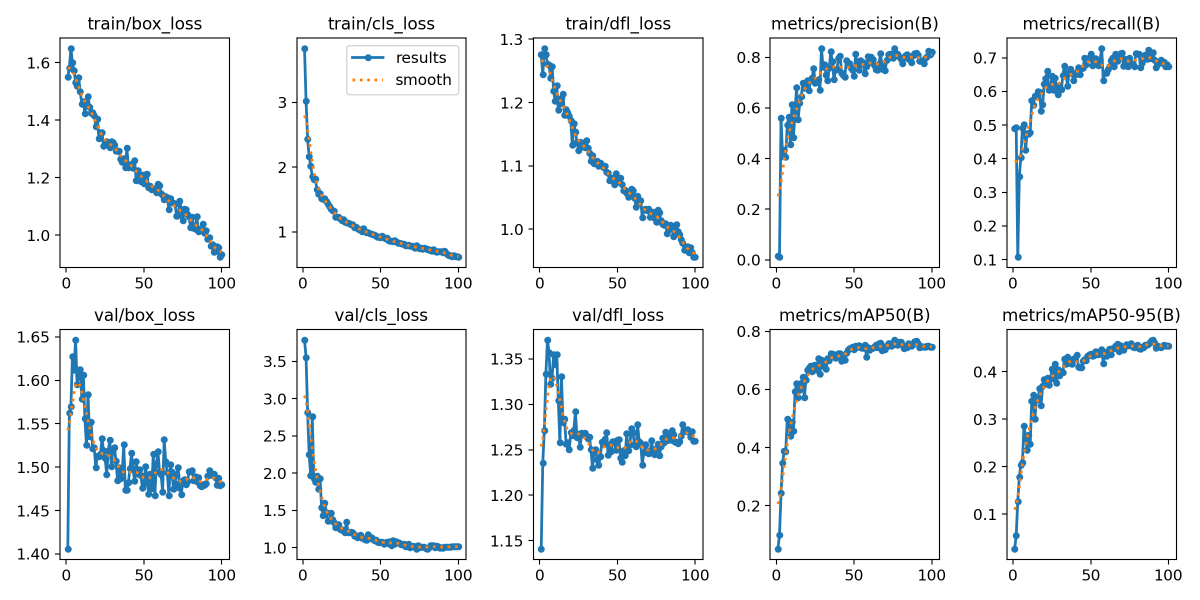

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/detect/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


# **6. Custom 모델로 Detection(검출)**

**Image Detection**

In [ ]:
# 모델 예측
results = model.predict(source='/content/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg', save=True)


image 1/1 /content/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 26 penguins, 47.1ms
Speed: 3.6ms preprocess, 47.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train2


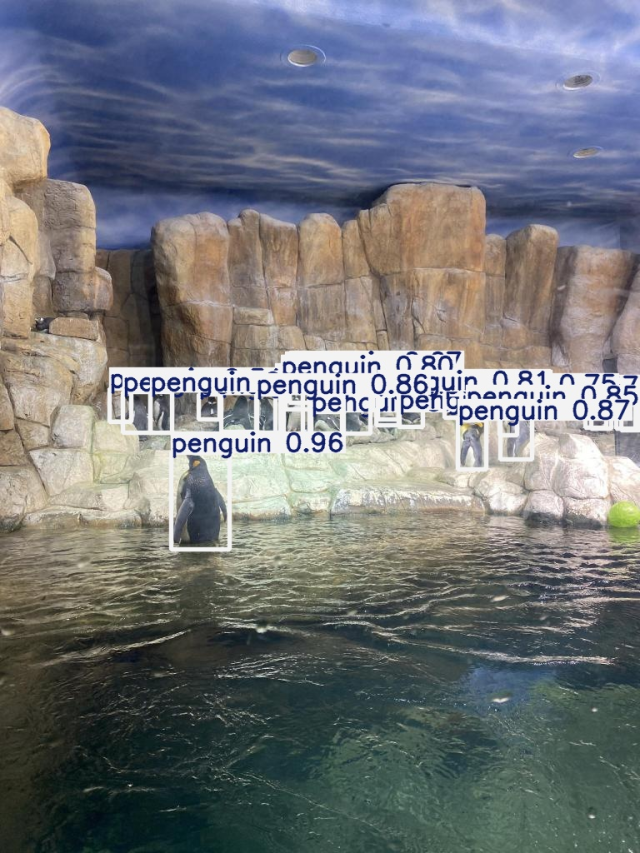

In [ ]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/detect/train2/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

**Video Detection**

In [ ]:
# 동영상 예측
results = model.predict(source='/content/shark.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/148) /content/shark.mp4: 384x640 2 sharks, 47.9ms
video 1/1 (frame 2/148) /content/shark.mp4: 384x640 1 fish, 2 sharks, 9.7ms
video 1/1 (frame 3/148) /content/shark.mp4: 384x640 2 sharks, 8.8ms
video 1/1 (frame 4/148) /content/shark.mp4: 384x640 2 sharks, 10.7ms
video 1/1 (frame 5/148) /content/shark.mp4: 384x640 2 sharks, 8.4ms
video 1/1 (frame 6/148) /content/shark.mp4: 384x640 2 sharks, 10.8ms
video 1/1 (frame 7/148) /content/shar

In [ ]:
# 코랩에서 영상을 보여줄 준비
import io
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# avi 파일을 mp4 파일로 변환 후 영상을 보여줌
import os
path_video = os.path.join("/content/runs/detect/train3","shark.avi")
%cd /content/runs/detect/train3
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ffmpeg -y -loglevel panic -i "shark.avi" "shark.mp4"
%cd ../../../

# output object tracking video
path_output = os.path.join("/content/runs/detect/train3","shark.mp4")
show_video(path_output, width=640)

/content/runs/detect/train3
/content


# **7. 학습된 모델을 불러와 검출**

In [ ]:
# ultralytics 설치
!pip install ultralytics

# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# 학습된 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


In [ ]:
# 모델 예측
results = model.predict(source='/content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg', save=True)


image 1/1 /content/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 9 penguins, 17.0ms
Speed: 3.5ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


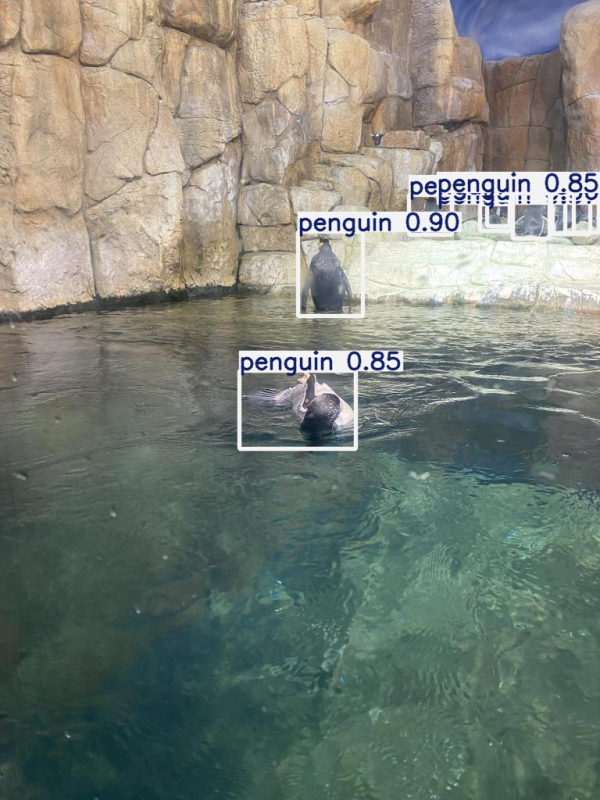

In [ ]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/detect/predict/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg')
fix_width = 600
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)